<a href="https://colab.research.google.com/github/TianXie1999/Deep-Learning-in-OR-FE/blob/main/Gradient%20Descent%20and%20Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **4742 Assignment1**
Tian Xie (tx2221)

#### **Problem 1**

Assume the feed-forward neural network has $m$ input varaibles,$n$ hidden layers, each hidden layer has $k_j$ neurons, which are $h_i^j$ for $i = 1.....k_j$ and $j = 1...n$ . So we have:

$$ h_i^j = g_j(\sum_{k = 1}^{k = k_{j-1}}W_k^{jT}h^{j-1})$$

for $i = 1.....k_j$

Where $W_k$ is the column vector of weights for hidden layer and $h^{j-1}$ means all values of neurons in $j-1^{th}$ hidden layer.

From the above equation and, note that $g_j$ is linear function and $\sum_{k = 1}^{k = k_i}W_k^Th^{j-1}$ is a number $z_i^j$, so we can represent the equation as $h^j = A_jZ_j +B$ and $Z_j = W^{jT}h^{j-1}$ where $ W^{jT} $ is a $k_j$ by $k_{j-1}$ matrix, $A_j$ is a $1$ by $k_j$ matrix., $h^{j-1}$ is a $j-1$ by $1$ matrix.

Therefore, $h^j = A_j(W^{jT}h^{j-1}) +B = (A_jW^{jT})h^{j-1} +B $

The above equation proves that every hidden layer peforms a linear transformation. The linear transformation of $n$ linear transformation is still a linear transformation, which means this feed-forward neural network ultimately performs a linear transformation and is equal to
a **linear neural network with no hidden layer**.



#### **Problem 2**

#### **(a)**
 Modified based on the sample code, we can implement the process of using gradient-based optimization rountine as following:

Firstly, we still visualize y1 and y2:

Text(0.5, 1.0, 'Linear Classfication Example Tanh Hidden Layer')

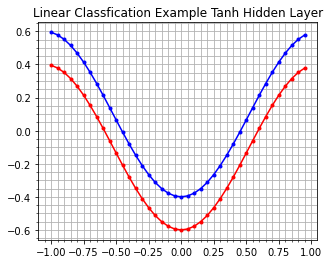

In [ ]:
import numpy as np
from operator import add
import matplotlib.pyplot as plt  
from scipy.optimize import minimize
import time
import os
np.random.seed(1000)
if not os.path.isdir('./figure/LinearClassificationExample_Tanh/'):
    os.makedirs('./figure/LinearClassificationExample_Tanh/')
figure_dir = './figure/LinearClassificationExample_Tanh/'
X,Y = np.meshgrid(np.arange(-1,1,0.05),np.arange(-1,2,0.05));
n1 = X.shape[0]
n2 = X.shape[1]
x = np.arange(-1,1,0.05)
y1 = -0.5*np.sin(3*x+np.pi/2)-0.10
y2 = -0.5*np.sin(3*x+np.pi/2)+0.10
plt.figure(figsize=(5,4))
plt.minorticks_on()
plt.grid(which='both')
plt.plot(x, y1, 'r.-')
plt.plot(x, y2, 'b.-')
plt.title('Linear Classfication Example Tanh Hidden Layer')

Then we should come to gradient based methods. Firstly, Let us derive the gradients.

Given that our loss is:

$$(a*xHat2 + b*yHat2 + c)-(a*xHat1 + b*yHat1 + c)$$

Therefore, if $a*x^{(i)}Hat2 + b*y^{(i)}Hat2 + c < 0$, we should let the gradient decent be the negative of the derivatives of each variable, which are:
$$ -\frac{de}{da} = -x^{(i)}Hat2 = -tanh(w11*x_i + w21*y2^{(i)} + b1)$$

$$ -\frac{de}{dc} = -1$$ 

$$ -\frac{de}{db} = -y^{(i)}Hat2$$ 

$$ -\frac{de}{dw11} =-\frac{de}{dx^{(i)}Hat2}*\frac{dx^{(i)}Hat2}{d(w11*x + w21*y2 + b1)}*\frac{d(w11*x + w21*y2 + b1)}{dw11} = -a*(1-tan^2h(w11*x^i + w21*y2^i + b1))* x^i $$

$$ -\frac{de}{dw21} =-\frac{de}{dx^{(i)}Hat2}*\frac{dx^{(i)}Hat2}{d(w11*x + w21*y2 + b1)}*\frac{d(w11*x + w21*y2 + b1)}{dw21} = -a*(1-tan^2h(w11*x^i + w21*y2^i + b1))* y2^{(i)} $$

$$ -\frac{de}{dw12} =-\frac{de}{dy^{(i)}Hat2}*\frac{dy^{(i)}Hat2}{d(w12*x + w22*y2 + b2)}*\frac{d(w12*x + w22*y2 + b2)}{dw12} = -b*(1-tan^2h(w12*x + w22*y2 + b2))* x^{(i)} $$

$$ -\frac{de}{dw22} =-\frac{de}{dy^{(i)}Hat2}*\frac{dy^{(i)}Hat2}{d(w12*x + w22*y2 + b2)}*\frac{d(w12*x + w22*y2 + b2)}{dw22} = -b*(1-tan^2h(w12*x + w22*y2 + b2))* y^{(i)} $$

$$ -\frac{de}{db1} =-\frac{de}{dx^{(i)}Hat2}*\frac{dx^{(i)}Hat2}{d(w11*x + w21*y2 + b1)} = -a*(1-tan^2h(w11*x + w21*y2 + b1)) $$

$$ -\frac{de}{db2} =-\frac{de}{dy^{(i)}Hat2}*\frac{dy^{(i)}Hat2}{d(w12*x + w22*y2 + b2)} = -b*(1-tan^2h(w12*x + w22*y2 + b2)) $$

Then if $a*x^{(i)}Hat1 + b*y^{(i)}Hat1 + c > 0$ we just take the derivative of every variable.

Then let us write the gradient decent function:


In [ ]:
def grad(params, x, y1, y2, x_hat, y_hat, e, y_positive, ratee):
    a, b, c, w11, w12, w21, w22, b1, b2 = params
    gs = [0,0,0,0,0,0,0,0,0]
    if y_positive == True:
      for i in range(len(e)):
        if e[i] < 0:
          #Gradient descent
          rate = ratee
          ng = [rate*x_hat[i], rate*y_hat[i], rate*1, rate*a*x[i]*(1 - x_hat[i]*x_hat[i]), 
                 rate*b*x[i]*(1 - y_hat[i]*y_hat[i]), rate*a*y2[i]*(1 - x_hat[i]*x_hat[i]), rate*b*y2[i]*(1 - y_hat[i]*y_hat[i]),
                 rate*a*(1 - x_hat[i]*x_hat[i]), rate*b*(1 - y_hat[i]*y_hat[i])]
          gs = list(map(add, gs, ng)) 
      return gs
          
    else:
      for i in range(len(e)):
        if e[i] < 0:
          rate = -ratee
          #Gradient descent
          ng = [rate*x_hat[i], rate*y_hat[i], rate*1, rate*a*x[i]*(1 - x_hat[i]*x_hat[i]), 
                 rate*b*x[i]*(1 - y_hat[i]*y_hat[i]), rate*a*y1[i]*(1 - x_hat[i]*x_hat[i]), rate*b*y1[i]*(1 - y_hat[i]*y_hat[i]),
                 rate*a*(1 - x_hat[i]*x_hat[i]), rate*b*(1 - y_hat[i]*y_hat[i])]
          gs = list(map(add, gs, ng))
      return gs

In above function, I implement the code of doing one time of gradient descent process, then given n_iter, we implement the solve objective function.

In [ ]:
def solve_objFunc(params, X, Y, x, y1, y2, dummy, ratee):
    
    a, b, c, w11, w12, w21, w22, b1, b2 = params

    mae = 0
    
    xHat = np.tanh(w11*X + w21*Y + b1)
    yHat = np.tanh(w12*X + w22*Y + b2)
    
    xHat1 = np.tanh(w11*x + w21*y1 + b1)
    yHat1 = np.tanh(w12*x + w22*y1 + b2)
    
    xHat2 = np.tanh(w11*x + w21*y2 + b1)
    yHat2 = np.tanh(w12*x + w22*y2 + b2)
    
    # for y2 t = 1
    # Loss part one: positive samples
    # for y1 t = -1
    # Loss part two: negative samples
    e2 = +1*(a*xHat2 + b*yHat2 + c)
    mae = mae - np.sum(e2[e2<0])
    e1 = -1*(a*xHat1 + b*yHat1 + c)
    mae = mae - np.sum(e1[e1<0])
    #print(mae)

    
    plt.figure(figsize=(5,5))
    
    for i in np.arange(n1):
        plt.plot(xHat[i,:],yHat[i,:], 'c.-')
    for i in np.arange(n2):
        plt.plot(xHat[:,i],yHat[:,i], 'c.-')
        
    plt.plot(xHat1, yHat1,'b.-')
    plt.plot(xHat2, yHat2,'r.-')
    plt.plot(x, (-c-a*x)/b, 'g-')
    
    plt.fill_between(x,np.min([-1, np.min(yHat1),np.min((-c-a*x)/b)]),(-c-a*x)/b,color='g',alpha=0.3)

    hm = int(time.time()-dummy)
    if hm < 101:
        if hm>0:
            plt.savefig(figure_dir + 'linearClassificationTanhHiddenLayer-'+ str(hm-1)+'.png')
        else:
            plt.savefig(figure_dir + 'linearClassificationTanhHiddenLayer-'+str(hm)+'.png')
    
    plt.close()
    
    #gradient descent part
    y_positive = True
    gs = grad(params, x, y1, y2, xHat2, yHat2, e2, y_positive, ratee)
    y_positive = False
    gs_2 = grad(params, x, y1, y2, xHat1, yHat1, e1, y_positive, ratee)
    gs  = list(map(add, gs, gs_2))
    params = list(map(add, params, gs))
    #print(params)
    return params

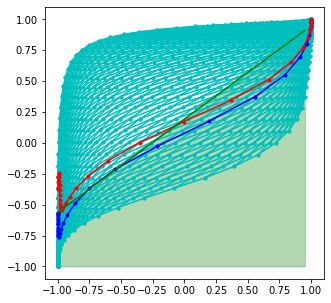

In [ ]:
# tanh hidden layer
a  = 0.5
b = 1
c = -0.5
w11 = 5
w12 = 2
w21 = 3
w22 = 2
b1  = 0.0
b2  = 0.0
params =  [a, b, c, w11, w12, w21, w22, b1, b2]

dummy=time.time()

# Note: We are setting max iteration = 100, and learning rate is 0.001

maxiter = 100
rate = 0.001
for i in range(maxiter):
  #print('Loss After Iteration %d'%i)
  params = solve_objFunc(params, X, Y, x, y1, y2, dummy, rate)

a, b, c, w11, w12, w21, w22, b1, b2 = params

xHat = np.tanh(w11*X + w21*Y + b1)
yHat = np.tanh(w12*X + w22*Y + b2)
xHat1 = np.tanh(w11*x + w21*y1 + b1)
yHat1 = np.tanh(w12*x + w22*y1 + b2)
xHat2 = np.tanh(w11*x + w21*y2 + b1)
yHat2 = np.tanh(w12*x + w22*y2 + b2)

plt.figure(figsize=(5,5))
for i in np.arange(n1):
    plt.plot(xHat[i,:],yHat[i,:], 'c.-')
for i in np.arange(n2):
    plt.plot(xHat[:,i],yHat[:,i], 'c.-')
plt.plot(xHat1,yHat1,'b.-')
plt.plot(xHat2,yHat2,'r.-')
plt.plot(x, (-c-a*x)/b, 'g-')
plt.fill_between(x,np.min([-1, np.min(yHat1),np.min((-c-a*x)/b)]),(-c-a*x)/b,color='g',alpha=0.3)

**From above graph and message printed, we can see our loss keeps decreasing, although the final curve does not separate the lines perfectly.**

#### **(b) Using different Starting Points**

We modify the cell of the above code to use different starting points as following:

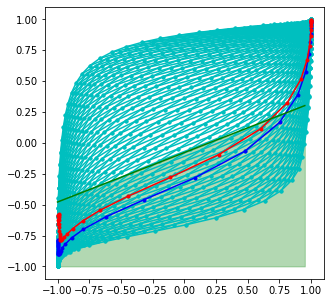

In [ ]:
# modify a to 1, b to 0.5, c to 1
a  = 1
b = 0.5
c =  1
w11 = 5
w12 = 2
w21 = 3
w22 = 2
b1  = 0.0
b2  = 0.0
params =  [a, b, c, w11, w12, w21, w22, b1, b2]

dummy=time.time()

# Note: We are setting max iteration = 100, and learning rate is 0.001

maxiter = 100
rate = 0.001
for i in range(maxiter):
  #print('Loss After Iteration %d'%i)
  params = solve_objFunc(params, X, Y, x, y1, y2, dummy, rate)

a, b, c, w11, w12, w21, w22, b1, b2 = params

xHat = np.tanh(w11*X + w21*Y + b1)
yHat = np.tanh(w12*X + w22*Y + b2)
xHat1 = np.tanh(w11*x + w21*y1 + b1)
yHat1 = np.tanh(w12*x + w22*y1 + b2)
xHat2 = np.tanh(w11*x + w21*y2 + b1)
yHat2 = np.tanh(w12*x + w22*y2 + b2)

plt.figure(figsize=(5,5))
for i in np.arange(n1):
    plt.plot(xHat[i,:],yHat[i,:], 'c.-')
for i in np.arange(n2):
    plt.plot(xHat[:,i],yHat[:,i], 'c.-')
plt.plot(xHat1,yHat1,'b.-')
plt.plot(xHat2,yHat2,'r.-')
plt.plot(x, (-c-a*x)/b, 'g-')
plt.fill_between(x,np.min([-1, np.min(yHat1),np.min((-c-a*x)/b)]),(-c-a*x)/b,color='g',alpha=0.3)


**The gradient descent behaves much worse! Then let's try other parameters:**

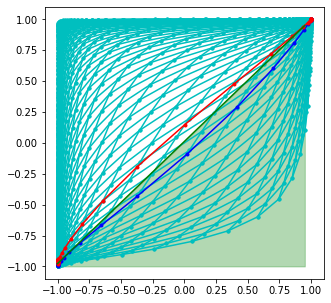

In [ ]:
# modify a to 1, b to 0.5, c to 1
a  = -5
b = 5
c =  0
w11 = 6
w12 = 4
w21 = 2
w22 = 3
b1  = -1.0
b2  = 0.0
params =  [a, b, c, w11, w12, w21, w22, b1, b2]

dummy=time.time()

# Note: We are setting max iteration = 100, and learning rate is 0.001

maxiter = 100
rate = 0.001
for i in range(maxiter):
  params = solve_objFunc(params, X, Y, x, y1, y2, dummy, rate)

a, b, c, w11, w12, w21, w22, b1, b2 = params

xHat = np.tanh(w11*X + w21*Y + b1)
yHat = np.tanh(w12*X + w22*Y + b2)
xHat1 = np.tanh(w11*x + w21*y1 + b1)
yHat1 = np.tanh(w12*x + w22*y1 + b2)
xHat2 = np.tanh(w11*x + w21*y2 + b1)
yHat2 = np.tanh(w12*x + w22*y2 + b2)

plt.figure(figsize=(5,5))
for i in np.arange(n1):
    plt.plot(xHat[i,:],yHat[i,:], 'c.-')
for i in np.arange(n2):
    plt.plot(xHat[:,i],yHat[:,i], 'c.-')
plt.plot(xHat1,yHat1,'b.-')
plt.plot(xHat2,yHat2,'r.-')
plt.plot(x, (-c-a*x)/b, 'g-')
plt.fill_between(x,np.min([-1, np.min(yHat1),np.min((-c-a*x)/b)]),(-c-a*x)/b,color='g',alpha=0.3)

This time it is apparently better!

#### **(c) Use different objective functions**

Let us use hinge loss.

$$Hinge Loss = \sum\limits_{i=1}^{N}(1-y_i(wx_i+b)) $$

Where we only get positive part of above equation, just like the loss in proposal 2 of the lecture.

Then simulate as following codes:

In [ ]:
# Objective Function (with hidden layer)
def objFunc2(params, X, Y, x, y1, y2, dummy):
    
    a, b, c, w11, w12, w21, w22, b1, b2 = params

    mae = 0
    
    xHat = np.tanh(w11*X + w21*Y + b1)
    yHat = np.tanh(w12*X + w22*Y + b2)
    
    xHat1 = np.tanh(w11*x + w21*y1 + b1)
    yHat1 = np.tanh(w12*x + w22*y1 + b2)
    
    xHat2 = np.tanh(w11*x + w21*y2 + b1)
    yHat2 = np.tanh(w12*x + w22*y2 + b2)
    
    # for y2 t = 1
    # Loss part one: positive samples
    e = (a*xHat2 + b*yHat2 + c - np.ones(40))/np.sqrt(a**2+b**2)
    mae = mae - np.sum(e[e<0])
    
    # for y1 t = -1
    # Loss part two: negative samples
    e = (-1*(a*xHat1 + b*yHat1 + c) - np.ones(40))/np.sqrt(a**2+b**2)
    mae = mae - np.sum(e[e<0])
    
    plt.figure(figsize=(10,10))
    
    for i in np.arange(n1):
        plt.plot(xHat[i,:],yHat[i,:], 'c.-')
    for i in np.arange(n2):
        plt.plot(xHat[:,i],yHat[:,i], 'c.-')
        
    plt.plot(xHat1, yHat1,'b.-')
    plt.plot(xHat2, yHat2,'r.-')
    plt.plot(x, (-c-a*x)/b, 'g-')
    
    plt.fill_between(x,np.min([-1, np.min(yHat1),np.min((-c-a*x)/b)]),(-c-a*x)/b,color='g',alpha=0.3)

    hm = int(time.time()-dummy)
    if hm < 101:
        if hm>0:
            plt.savefig(figure_dir + 'linearClassificationTanhHiddenLayer-'+ str(hm-1)+'.png')
        else:
            plt.savefig(figure_dir + 'linearClassificationTanhHiddenLayer-'+str(hm)+'.png')
    
    plt.close()
    return mae

In [ ]:
# tanh hidden layer
tol = 1e-10

a  = 0.5
b = 1
c = -0.5
w11 = 5
w12 = 2
w21 = 3
w22 = 2
b1  = 0.0
b2  = 0.0
params =  np.array([a, b, c, w11, w12, w21, w22, b1, b2])

dummy=time.time()

# Q: optimization routine we are using here
res = minimize(objFunc2, params, args=(X, Y, x, y1, y2, dummy), tol=tol, options={'disp': True, 'maxiter':500})

         Current function value: 0.280818
         Iterations: 30
         Function evaluations: 1695
         Gradient evaluations: 153


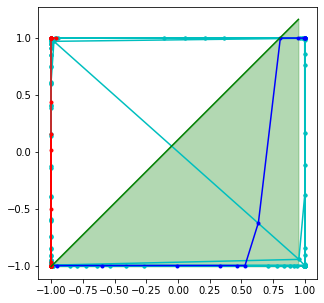

In [ ]:
a, b, c, w11, w12, w21, w22, b1, b2 = res.x
xHat = np.tanh(w11*X + w21*Y + b1)
yHat = np.tanh(w12*X + w22*Y + b2)
xHat1 = np.tanh(w11*x + w21*y1 + b1)
yHat1 = np.tanh(w12*x + w22*y1 + b2)
xHat2 = np.tanh(w11*x + w21*y2 + b1)
yHat2 = np.tanh(w12*x + w22*y2 + b2)
plt.figure(figsize=(5,5))
for i in np.arange(n1):
    plt.plot(xHat[i,:],yHat[i,:], 'c.-')
for i in np.arange(n2):
    plt.plot(xHat[:,i],yHat[:,i], 'c.-')
plt.plot(xHat1,yHat1,'b.-')
plt.plot(xHat2,yHat2,'r.-')
plt.plot(x, (-c-a*x)/b, 'g-')
plt.fill_between(x,np.min([-1, np.min(yHat1),np.min((-c-a*x)/b)]),(-c-a*x)/b,color='g',alpha=0.3)

Although the plot is a bit **TOO DISTORTED**, the line actually divides the red and blue points quite well...

#### **(d) Conclusion**
1. Gradient-based rountine is subject to the change of starting points.

2. Hinge loss is much more strict than the loss proposed in the lecture, and sometimes it is not necessary.

#### **Problem 3**

#### **(a)**




Text(0.5, 1.0, 'Linear Classfication for Problem 3')

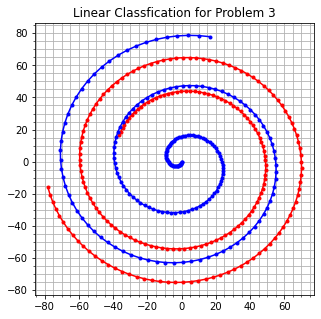

In [ ]:
import numpy as np
from operator import add
import matplotlib.pyplot as plt  
from scipy.optimize import minimize
import time
import os
import math
t = np.arange(-100,100,1)
r1 = 60+0.2*t
r2 = 40+0.4*t
fi1 = -0.06*t + 3
fi2 = -0.08*t + 3
x1 = r1*np.cos(fi1)
y1 = r1*np.sin(fi1)
x2 = r2*np.cos(fi2)
y2 = r2*np.sin(fi2)

plt.figure(figsize=(5,5))
plt.minorticks_on()
plt.grid(which='both')
plt.plot(x1, y1, 'r.-')
plt.plot(x2, y2, 'b.-')
plt.title('Linear Classfication for Problem 3')
# Below shows the two Spirals

#### **(b)**

### **Regular Loss in Proposal 2**

In [ ]:
# Objective Function (with hidden layer)
def objFunc(params, x1, x2, y1, y2):
    
    a, b, c, d, w11, w12, w13, w21, w22, w23, b1, b2, b3 = params

    mae = 0


    xHat1 = np.tanh(w11*x1 + w21*y1 + b1)
    yHat1 = np.tanh(w12*x1 + w22*y1 + b2)
    zHat1 = np.tanh(w13*x1 + w23*y1 + b3)
    xHat2 = np.tanh(w11*x2 + w21*y2 + b1)
    yHat2 = np.tanh(w12*x2 + w22*y2 + b2)
    zHat2 = np.tanh(w13*x2 + w23*y2 + b3)
    
    # for y2 t = 1
    # Loss part one: positive samples
    e = 1*(a*xHat2 + b*yHat2 + c*zHat2 + d)/np.sqrt(a**2+b**2+c**2)
    mae = mae - np.sum(e[e<0])
    
    # for y1 t = -1
    # Loss part two: negative samples
    e = -1*(a*xHat1 + b*yHat1 + c*zHat2 + d)/np.sqrt(a**2+b**2+c**2)
    mae = mae - np.sum(e[e<0])
    return mae

In [ ]:
tol = 1e-10
a  = 1
b = -2
c = 10
d = 10
w11 = 1
w12 = 0.5
w13 = 2
w21 = -1
w22 = 1
w23 = 0.5
b1  = 0.0
b2  = 0.0
b3 =  0.0
params =  np.array([a, b, c, d, w11, w12, w13, w21, w22,w23, b1, b2, b3])
res = minimize(objFunc, params, args=(x1, x2, y1, y2), tol=tol, options={'disp': True, 'maxiter':500})

         Current function value: 23.496061
         Iterations: 64
         Function evaluations: 2847
         Gradient evaluations: 189


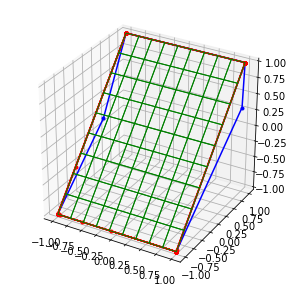

In [ ]:
import mpl_toolkits.mplot3d as p3d
a, b, c, d, w11, w12, w13, w21, w22, w23, b1, b2, b3 = res.x

xHat1 = np.tanh(w11*x1 + w21*y1 + b1)
yHat1 = np.tanh(w12*x1 + w22*y1 + b2)
zHat1 = np.tanh(w13*x1 + w23*y1 + b3)
xHat2 = np.tanh(w11*x2 + w21*y2 + b1)
yHat2 = np.tanh(w12*x2 + w22*y2 + b2)
zHat2 = np.tanh(w13*x2 + w23*y2 + b3)

plt.figure(figsize=(5,5))
ax = plt.gca(projection='3d')
x = np.linspace(-1,1,10)
y = np.linspace(-1,1,10)
X,Y = np.meshgrid(x,y)
Z = (-d-b*Y-a*X)/c
ax.plot3D(xHat1,yHat1,zHat1,'b.-')
ax.plot3D(xHat2,yHat2,zHat2,'r.-')
ax.plot_surface(X,Y,Z,alpha=0,edgecolors='g')

From above plot and the current loss error, the hyper plane somewhat divides the two spirals in 3D space, but it is not actually satisfying enough. **I have tried different starting points, but all are not good...**So let's try different loss function.

### **Hinge Loss**

In [ ]:
# Objective Function (with hidden layer)
def HingeObjFunc(params, x1, x2, y1, y2):
    
    a, b, c, d, w11, w12, w13, w21, w22, w23, b1, b2, b3 = params

    mae = 0


    xHat1 = np.tanh(w11*x1 + w21*y1 + b1)
    yHat1 = np.tanh(w12*x1 + w22*y1 + b2)
    zHat1 = np.tanh(w13*x1 + w23*y1 + b3)
    xHat2 = np.tanh(w11*x2 + w21*y2 + b1)
    yHat2 = np.tanh(w12*x2 + w22*y2 + b2)
    zHat2 = np.tanh(w13*x2 + w23*y2 + b3)
    
    # for y2 t = 1
    # Hinge Loss part one: positive samples
    e = 1*(a*xHat2 + b*yHat2 + c*zHat2 + d - np.ones(200))/np.sqrt(a**2+b**2+c**2)
    mae = mae - np.sum(e[e<0])
    
    # for y1 t = -1
    # Hinge Loss part two: negative samples
    e = (-1*(a*xHat1 + b*yHat1 + c*zHat2 + d) - np.ones(200))/np.sqrt(a**2+b**2+c**2)
    mae = mae - np.sum(e[e<0])
    return mae

In [ ]:
tol = 1e-10
a  = 1
b = -2
c = 10
d = 10
w11 = 1
w12 = 0.5
w13 = 2
w21 = -1
w22 = 1
w23 = 0.5
b1  = 0.0
b2  = 0.0
b3 =  0.0
params =  np.array([a, b, c, d, w11, w12, w13, w21, w22,w23, b1, b2, b3])
res = minimize(HingeObjFunc, params, args=(x1, x2, y1, y2), tol=tol, options={'disp': True, 'maxiter':500})

         Current function value: 28.275400
         Iterations: 46
         Function evaluations: 1256
         Gradient evaluations: 83


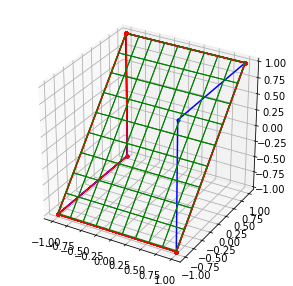

In [ ]:
import mpl_toolkits.mplot3d as p3d
a, b, c, d, w11, w12, w13, w21, w22, w23, b1, b2, b3 = res.x

xHat1 = np.tanh(w11*x1 + w21*y1 + b1)
yHat1 = np.tanh(w12*x1 + w22*y1 + b2)
zHat1 = np.tanh(w13*x1 + w23*y1 + b3)
xHat2 = np.tanh(w11*x2 + w21*y2 + b1)
yHat2 = np.tanh(w12*x2 + w22*y2 + b2)
zHat2 = np.tanh(w13*x2 + w23*y2 + b3)

plt.figure(figsize=(5,5))
ax = plt.gca(projection='3d')
x = np.linspace(-1,1,10)
y = np.linspace(-1,1,10)
X,Y = np.meshgrid(x,y)
Z = (-d-b*Y-a*X)/c
ax.plot3D(xHat1,yHat1,zHat1,'b.-')
ax.plot3D(xHat2,yHat2,zHat2,'r.-')
ax.plot_surface(X,Y,Z,alpha=0,edgecolors='g')

This seems better according to the plot.